In [1]:
import pandas as pd
import numpy  as np

In [2]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-03-30 15:51:34--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111397397 (106M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 106.24M  8.37MB/s    in 12s     

2021-03-30 15:51:46 (8.59 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [111397397/111397397]



In [3]:
df_case = pd.read_csv(
    'COVID-19_casus_landelijk.csv',
    sep=';',
    parse_dates=[0, 1],
    infer_datetime_format=True,
)
(
    df_case
    .tail(10)
)

Date_file Date_statistics Date_statistics_type Agegroup  \
1264973 2021-03-30 10:00:00      2021-03-30                  DPL    80-89   
1264974 2021-03-30 10:00:00      2021-03-30                  DON    50-59   
1264975 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264976 2021-03-30 10:00:00      2021-03-30                  DPL    50-59   
1264977 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264978 2021-03-30 10:00:00      2021-03-30                  DPL    50-59   
1264979 2021-03-30 10:00:00      2021-03-30                  DPL    60-69   
1264980 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264981 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264982 2021-03-30 10:00:00      2021-03-30                  DPL    70-79   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1264973  Female        Utrecht            Unknown  Unknown            NaN   
1264974  Female  Noord-Holland            Unknown  Unknown            NaN   
1264975  Female   Zuid-Holland            Unknown  Unknown            NaN   
1264976    Male   Zuid-Holland            Unknown  Unknown            NaN   
1264977  Female  Noord-Holland            Unknown  Unknown            NaN   
1264978    Male  Noord-Holland            Unknown  Unknown            NaN   
1264979    Male   Zuid-Holland            Unknown  Unknown            NaN   
1264980  Female   Zuid-Holland            Unknown  Unknown            NaN   
1264981  Female   Zuid-Holland            Unknown  Unknown            NaN   
1264982  Female        Utrecht            Unknown  Unknown            NaN   

              Municipal_health_service  
1264973              GGD Regio Utrecht  
1264974               GGD Kennemerland  
1264975            GGD Hollands-Midden  
1264976            GGD Hollands-Midden  
1264977                  GGD Amsterdam  
1264978                  GGD Amsterdam  
1264979  Dienst Gezondheid & Jeugd ZHZ  
1264980            GGD Hollands-Midden  
1264981            GGD Hollands-Midden  
1264982              GGD Regio Utrecht

In [4]:
# Define period labels
df_case['period'] = (
    (
        df_case
        ['Date_statistics']
        .dt
        .isocalendar()
        .year
        * 100
    )
    +
    (
        df_case
        ['Date_statistics']
        .dt
        .isocalendar()
        .week
    )
)
df_case['period'] = (
    df_case
    ['period']
    .apply(str)
)
df_case['period'] = (
    df_case
    ['period']
    .apply(
        lambda x: (
            x[:4]
            + 'W'
            + x
            [4:]
        )
    )
)
# Define group labels
df_case['groups'] = (
    (
        df_case
        ['Sex']
        + ' '
    )
    +
    (
        df_case
        ['Agegroup']
    )
)
(
    df_case
    .tail(10)
)

Date_file Date_statistics Date_statistics_type Agegroup  \
1264973 2021-03-30 10:00:00      2021-03-30                  DPL    80-89   
1264974 2021-03-30 10:00:00      2021-03-30                  DON    50-59   
1264975 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264976 2021-03-30 10:00:00      2021-03-30                  DPL    50-59   
1264977 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264978 2021-03-30 10:00:00      2021-03-30                  DPL    50-59   
1264979 2021-03-30 10:00:00      2021-03-30                  DPL    60-69   
1264980 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264981 2021-03-30 10:00:00      2021-03-30                  DPL    30-39   
1264982 2021-03-30 10:00:00      2021-03-30                  DPL    70-79   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
1264973  Female        Utrecht            Unknown  Unknown            NaN   
1264974  Female  Noord-Holland            Unknown  Unknown            NaN   
1264975  Female   Zuid-Holland            Unknown  Unknown            NaN   
1264976    Male   Zuid-Holland            Unknown  Unknown            NaN   
1264977  Female  Noord-Holland            Unknown  Unknown            NaN   
1264978    Male  Noord-Holland            Unknown  Unknown            NaN   
1264979    Male   Zuid-Holland            Unknown  Unknown            NaN   
1264980  Female   Zuid-Holland            Unknown  Unknown            NaN   
1264981  Female   Zuid-Holland            Unknown  Unknown            NaN   
1264982  Female        Utrecht            Unknown  Unknown            NaN   

              Municipal_health_service   period        groups  
1264973              GGD Regio Utrecht  2021W13  Female 80-89  
1264974               GGD Kennemerland  2021W13  Female 50-59  
1264975            GGD Hollands-Midden  2021W13  Female 30-39  
1264976            GGD Hollands-Midden  2021W13    Male 50-59  
1264977                  GGD Amsterdam  2021W13  Female 30-39  
1264978                  GGD Amsterdam  2021W13    Male 50-59  
1264979  Dienst Gezondheid & Jeugd ZHZ  2021W13    Male 60-69  
1264980            GGD Hollands-Midden  2021W13  Female 30-39  
1264981            GGD Hollands-Midden  2021W13  Female 30-39  
1264982              GGD Regio Utrecht  2021W13  Female 70-79

In [5]:
# Pivot to period rows with group columns
df_heat = (
    df_case
    [
        df_case
        ['Municipal_health_service']
        != ''
    ]
    .pivot_table(
        index='period',
        columns='groups',
        values='Date_statistics',
        aggfunc='count',
    )
    .fillna(0)
)
# Select columns to use, optionally subset or use relative numbers
#df_heat['total'] = (
#    df_heat[df_heat.columns[0:24]]
#    .sum(axis=1)
#)
df_heat = (
    df_heat
    [
        df_heat
        .columns[0:24]
    ]
    .loc['2020W26':]
#    .div(
#        df_heat['total'],
#        axis='index',
#    )
)
# Use this for relative growth numbers
#df_heat = df_heat / df_heat.shift()
(
    df_heat
    .tail(5)
    .loc[::-1]
    .transpose()
)

period          2021W13  2021W12  2021W11  2021W10  2021W09
groups                                                     
Female 0-9        167.0   1467.0   1729.0   1476.0   1168.0
Female 10-19      264.0   3056.0   3572.0   2897.0   2243.0
Female 20-29      262.0   3267.0   3887.0   3363.0   2937.0
Female 30-39      245.0   2971.0   3674.0   3153.0   2536.0
Female 40-49      257.0   2986.0   3627.0   3066.0   2404.0
Female 50-59      206.0   2888.0   3444.0   3139.0   2572.0
Female 60-69      132.0   1480.0   1891.0   1758.0   1375.0
Female 70-79       73.0    958.0   1154.0    987.0    820.0
Female 80-89       16.0    331.0    394.0    441.0    423.0
Female 90+          9.0     80.0     91.0    127.0    120.0
Female <50          0.0      0.0      0.0      1.0      1.0
Female Unknown      0.0      0.0      0.0      0.0      0.0
Male 0-9          149.0   1667.0   1918.0   1566.0   1254.0
Male 10-19        283.0   3199.0   3519.0   3092.0   2234.0
Male 20-29        266.0   3285.0   3776.0   3450.0   2830.0
Male 30-39        214.0   2714.0   3248.0   2744.0   2303.0
Male 40-49        230.0   2783.0   3366.0   2995.0   2253.0
Male 50-59        289.0   2978.0   3655.0   3411.0   2660.0
Male 60-69        157.0   1667.0   2244.0   1927.0   1633.0
Male 70-79        105.0    885.0   1093.0    984.0    836.0
Male 80-89         19.0    262.0    332.0    351.0    303.0
Male 90+            5.0     40.0     45.0     49.0     48.0
Male <50            0.0      0.0      0.0      1.0      0.0
Male Unknown        0.0      0.0      0.0      0.0      0.0

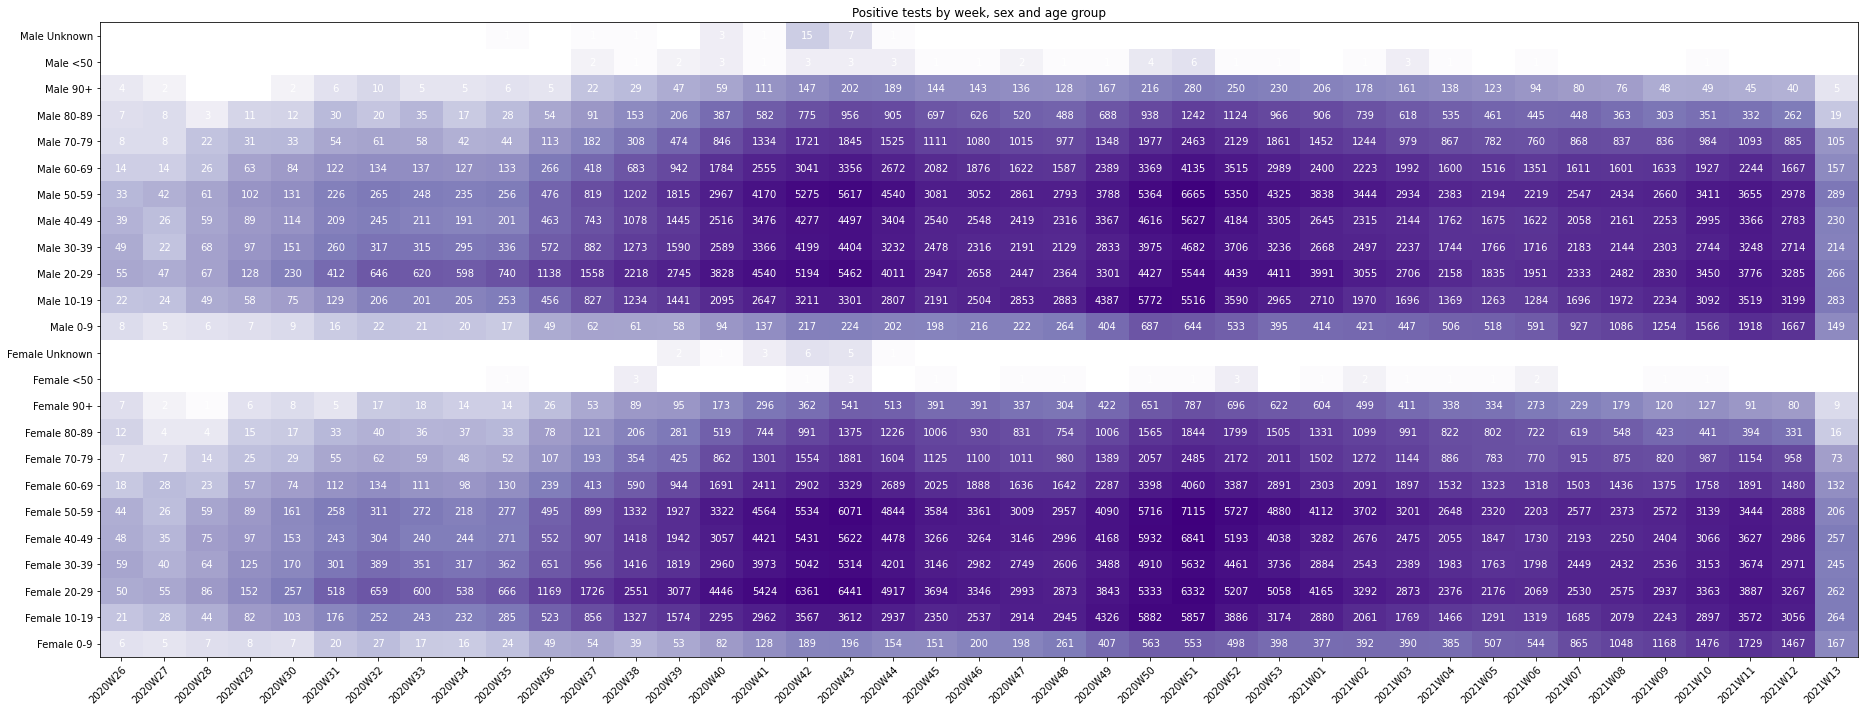

In [6]:
import matplotlib.pyplot as plt

# Define arrays of row and column headers
periods   = df_heat.index
agegroups = df_heat.columns

# Output size may have to be adjusted to data length eventually
fig, ax = plt.subplots(
    figsize=(26, 10),
)

# Heatmap on transposed data, X-axis inverted
heatmap = plt.imshow(
    np.log(
        df_heat
        [df_heat > 0]
        .loc[:]
        .transpose()
    ),
    cmap='Purples',
    interpolation='nearest',
    aspect='auto',
    origin='lower',
)

# Every value is an axis tick
ax.set_xticks(np.arange(len(periods)))
ax.set_yticks(np.arange(len(agegroups)))

ax.set_xticklabels(periods)
ax.set_yticklabels(agegroups)

# X labels diagonally
plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor",
)

# Convert dataframe to numpy format
np_heat = (
    df_heat
    .to_numpy()
)

# Set numbers as text labels
for i in range(len(periods)):
    for j in range(len(agegroups)):
        text = ax.text(
            i, j,
            int(np_heat[i, j]),
            ha="center",
            va="center",
            color="w",
        )

ax.set_title("Positive tests by week, sex and age group")
fig.tight_layout()
plt.show()